<a href="https://colab.research.google.com/github/Dy1anNeal/Image-recognition/blob/main/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installation

In [ ]:
pip install -q tensorflow tensorflow-datasets

##Import Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

#find datasets

In [ ]:
tfds.list_builders()


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

#Get info on data

In [ ]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

##prepare rock, paper, scissors data

In [ ]:
ds_train = tfds.load(name="rock_paper_scissors", split = "train")
ds_test = tfds.load(name="rock_paper_scissors", split = "test")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.11HLSY_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.11HLSY_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


##show examples

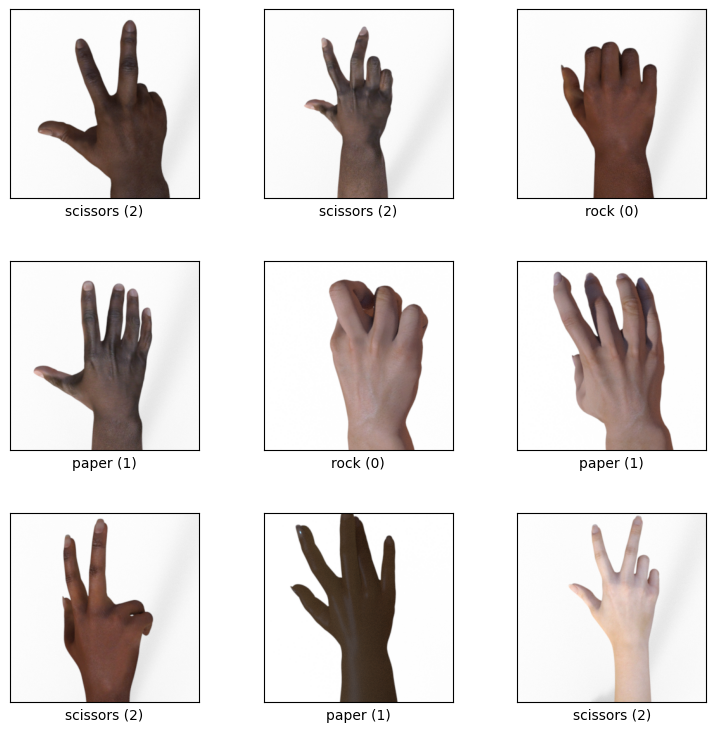

In [ ]:
fig = tfds.show_examples(ds_train,info)

##Additional data prep

In [ ]:
#loaded all data in numpy format
#Creating array                         sets rgb colour to just red
train_images =np.array([example["image"].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example["label"].numpy() for example in ds_train])


test_images =np.array([example["image"].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example["label"].numpy() for example in ds_test])

In [ ]:
train_images = train_images.reshape(2520,300,300,1)
test_images = test_images.reshape(372,300,300,1)

train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

#Normalise the images to make processing easier
train_images /= 255
test_images /= 255

##Train a network (basic)

In [ ]:
model = keras.Sequential([
    #Overfit model
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(3, activation="softmax"),

])
model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.3726 - loss: 56.8643
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5953 - loss: 2.9222
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7296 - loss: 1.8694
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7739 - loss: 0.8699
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8171 - loss: 0.5297


In [ ]:
#model currently overfits to training data
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4953 - loss: 2.8161


[2.9805996417999268, 0.4811827838420868]

##Train a network (convolutional approach)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation="relu", input_shape=(300,300,1)),
    keras.layers.Conv2D(32, 3, activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation="softmax"),
    ])

model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 302ms/step - accuracy: 0.5495 - loss: 10.9836
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.9075 - loss: 0.3966
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.9925 - loss: 0.0377
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.9997 - loss: 0.0081
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.9996 - loss: 0.0022


In [ ]:
#still overfitting
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 617ms/step - accuracy: 0.6076 - loss: 1.4595


[1.5781991481781006, 0.602150559425354]

##Better CNN

In [ ]:
model = keras.Sequential([
    #All goes towards making the image more generalised so that individual pixels dont have as much weight

    keras.layers.AveragePooling2D(pool_size=6, strides=3, input_shape=(300,300,1)),
    keras.layers.Conv2D(64, 3, activation="relu"),
    keras.layers.Conv2D(32, 3, activation="relu"),
    #goes over the image with 2x2 grid to get the max pixel value of them
    keras.layers.MaxPool2D(2,2),
    #50% connections will be cutout
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation="softmax"),
    ])

model.compile(optimizer="adam",
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.5616 - loss: 1.0845
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9747 - loss: 0.1285
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9944 - loss: 0.0232
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9985 - loss: 0.0074
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 1.0000 - loss: 0.0035


In [ ]:
model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7048 - loss: 0.9348


[0.9873839616775513, 0.6935483813285828]

## Hyperparameter tuning
https://keras.io/keras_tuner/

In [ ]:
#pip install keras-tuner --upgrade


In [ ]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(pool_size=6, strides=3, input_shape=(300,300,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation="relu"))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  #gives a range to run through to find the best combination
  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64,128,256,512,1024]), activation="relu"))

  model.add(keras.layers.Dense(3, activation="softmax"))

  model.compile(optimizer="adam",
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,)
    #directory="./new_directory1")

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Trial 32 Complete [00h 01m 16s]
val_accuracy: 0.7043010592460632

Best val_accuracy So Far: 0.8064516186714172
Total elapsed time: 00h 31m 26s


In [ ]:
best_model = tuner.get_best_models()[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
best_model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8145 - loss: 0.6851


[0.6975500583648682, 0.8064516186714172]

In [ ]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ average_pooling2d               │ (None, 99, 99, 1)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 97, 97, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 95, 95, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 93, 93, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 46, 46, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,333,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,341,347 (16.56 MB)

 Trainable params: 4,341,347 (16.56 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
Dense layer: 64
Score: 0.75

Trial 3 summary
Hyperparameters:
Dense layer: 128
Score: 0.7446236610412598

Trial 1 summary
Hyperparameters:
Dense layer: 1024
Score: 0.7231183052062988

Trial 2 summary
Hyperparameters:
Dense layer: 512
Score: 0.7204301357269287

Trial 0 summary
Hyperparameters:
Dense layer: 256
Score: 0.6639785170555115


## Save and load models

In [ ]:
best_model.save("./my_model.keras")

In [ ]:
loaded_model = keras.models.load_model("./my_model.keras")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
loaded_model.evaluate(test_images,test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8145 - loss: 0.6851


[0.6975500583648682, 0.8064516186714172]

#plot image from numpy array

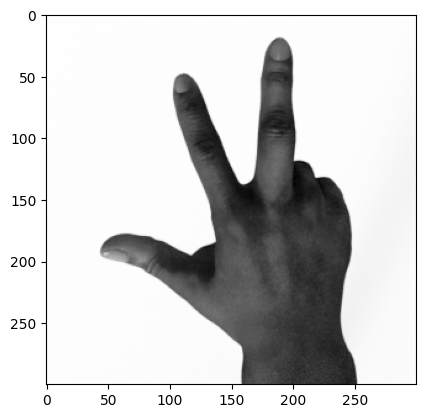

In [ ]:
rgb_images = np.array([example["image"].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]

image = train_images[0].reshape(300,300)

plt.imshow(image, cmap="Greys_r")

## convert png/jpeg to numpy

In [ ]:
import imageio

im = imageio.imread("./path/to/image or URL")
print(type(im))

im_np = np.asarray(im)

print(im_np.shape)